In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin,cos,pi,sqrt,exp,ceil
%matplotlib inline
from matplotlib import style
style.use('seaborn-notebook')

### Tarefa 01:

Escreva um programa que “integre” uma equação diferencial ordinária de primeira ordem $y'(t)=f(t,y(t))$ onde o usuário pode escolher o método de solução entre as seguintes possibilidades:<br>

#### A) Euler

In [2]:
def euler(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        K = funcao(t[k-1],Y_t[k-1])
        
        Y_t[k] = Y_t[k-1] + K*h
        
    return t,Y_t
    
    

***

#### B) Runge-Kutta segunda ordem:

In [3]:
def ordem2_RK(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        K1 = funcao(t[k-1],Y_t[k-1])
        K2 = funcao(t[k-1]+h,Y_t[k-1] + h*K1)
        Y_t[k] = Y_t[k-1] + (h/2.0)*(K1 + K2)
        
    return t,Y_t

***

#### C) Runge-Kutta quarta ordem:

In [4]:
def ordem4_RK(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        
        K1 = funcao(t[k-1],
                    Y_t[k-1])
        K2 = funcao(t[k-1]+h/2.0,
                    Y_t[k-1] + (h/2.0)*K1)
        K3 = funcao(t[k-1]+h/2.0,
                    Y_t[k-1] + (h/2.0)*K2)
        K4 = funcao(t[k-1]+h,
                    Y_t[k-1]+h*K3)
        
        Y_t[k] = Y_t[k-1]+(h/6.0)*(K1+2*K2+2*K3+K4)
    
    return t,Y_t

***

### Programa Geral para EDO de 1a ordem:

In [5]:
def edo_1ordem(funcao,y0,intervalo_T,passo,metodo='rk4'):
    '''"Integra" uma EDO de primeira ordem a partir de 3 diferentes
    metodos, escolha a criterio do usuario.
    
    Argumentos:
    
        Funcao(t,Y)
            Ex: lambda t,Y = 1/t**2 * Y;
            
        y0  
            Ex: .5;
        
        Intervalo de tempo T
            Intervalo de integracao T.
            Ex: 0 <= t <= 10  --> intervalo_T = [0,10];
        
        Passo
            Incremento h a ser aplicado a t a cada iteracao.
            No geral, metodos de menor ordem devem possuir menores
            valores Passo para obter boa precisao.
        
    Metodos aceitos:
        Runge-Kutta de 4a ordem: "rk4", metodo default.
        Runge-Kutta de 2a ordem: "rk2".
        Runge-Kutta de 1a ordem ou metodo de Euler:"euler".
    '''
    if metodo == 'euler':
        return euler(funcao,y0,intervalo_T,passo)
    
    elif metodo =='rk2':
        return ordem2_RK(funcao,y0,intervalo_T,passo)
    
    else:
        return ordem4_RK(funcao,y0,intervalo_T,passo)

***

### Exercicio 1) 
Utilizando o programa desenvolvido, use os métodos de Euler, Runge-Kutta segunda ordem e Runge-Kutta quarta ordem, para $0\leq t\leq10$ e resolva a seguinte equação diferencial ordinária:<br><br>
$y'(t)=-2ty(t)^2$<br>
$y(0)=1$<br><br>
Compare com a solução exata $y(t)=\frac{1}{1+t^2}$

In [6]:
ex_1 = lambda t,y: -2*t*y**2

- Calculando os valores reais da funcao para montar o grafico posteriormente:
<a id='celula_func_real'></a>

In [7]:
X_ex1 = np.linspace(0,10,400)
Vetor_ex1 = np.vectorize(lambda t: 1/(1+t**2))
Y_ex1 = Vetor_ex1(X_ex1)

***

**OBS:** Assumindo inicialmente um valor **alto** $h=0.5$ para todos os metodos:

#### Por metodo de Euler:

In [8]:
euler_05x,euler_05y = edo_1ordem(ex_1,1,[0,10],0.5,metodo='euler')

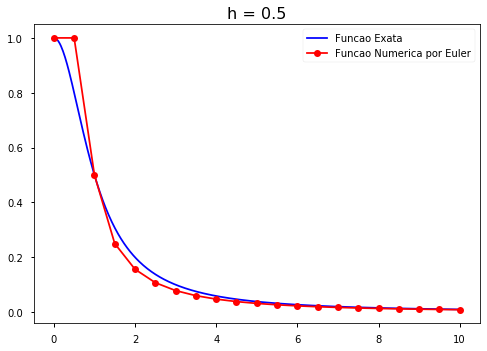

In [9]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Exata')
plt.plot(euler_05x,euler_05y,'ro-',label='Funcao Numerica por Euler')
plt.title('h = 0.5',{'fontsize': 16})
plt.legend()

#### Por Runge-Kutta segunda ordem:

In [10]:
rk2_05x,rk2_05y = edo_1ordem(ex_1,1,[0,10],0.5,metodo='rk2')

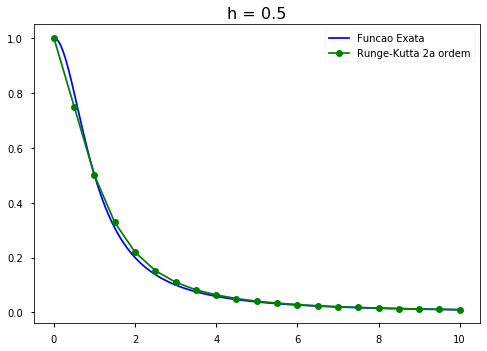

In [11]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Exata')
plt.plot(rk2_05x,rk2_05y,'go-',label='Runge-Kutta 2a ordem')
plt.title('h = 0.5',{'fontsize': 16})
plt.legend()

#### Por Runge-Kutta quarta ordem:

In [12]:
rk4_05x,rk4_05y = edo_1ordem(ex_1,1,[0,10],0.5,metodo='rk4')

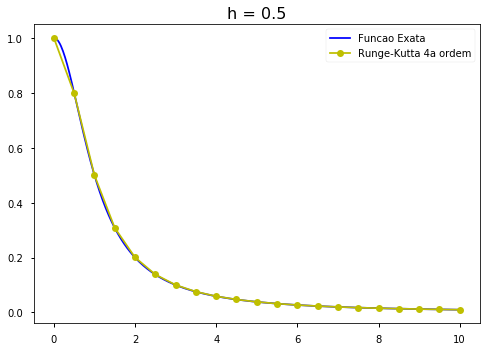

In [13]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Exata')
plt.plot(rk4_05x,rk4_05y,'yo-',label='Runge-Kutta 4a ordem')
plt.title('h = 0.5',{'fontsize': 16})
plt.legend()

**OBS** : Cada "bolinha" representa o par (x,y) que define o resultado para cada tempo $i$

#### Analise:
Percebe-se que o valor do passo ainda e bastante alto para a maioria dos metodos, principalmente para o metodo de Euler. O metodo que melhor se aproximou considerando um h tao alto foi o Runge-Kutta de 4a ordem, o que ja era esperado visto que ele considera mais termos da serie de taylor, aumentando sua precisao. Tal metodo apresentou boa proximidade com os valores reais para cada tempo, como pode ser observado no teste tabela e obversando as "bolinhas" do grafico. Entretanto, seu grafico "linha" nao ficou agradavel, visto que um passo de 0.5 aplicado a um intervalo de 10 retorna apenas 20 pontos. (existem 400 pontos sendo analisados para o grafico da [funcao real](#celula_func_real))

#### Teste tabela para $h = 0.5$:

In [14]:
data_05h = list(zip(rk2_05x,Vetor_ex1(rk2_05x),euler_05y,
                    rk2_05y,rk4_05y))
df_05h = pd.DataFrame(data_05h,columns=['T','Sol.Exata',
                                        'Euler','RK-2a ordem',
                       'RK-4a ordem'])
df_05h.head(10)

,T,Sol.Exata,Euler,RK-2a ordem,RK-4a ordem
0,0.0,1.000000,1.000000,1.000000,1.000000
1,0.5,0.800000,1.000000,0.750000,0.798379
2,1.0,0.500000,0.500000,0.499512,0.499702
3,1.5,0.307692,0.250000,0.327881,0.308167
4,2.0,0.200000,0.156250,0.219489,0.200406
5,2.5,0.137931,0.107422,0.152360,0.138190
6,3.0,0.100000,0.078573,0.109997,0.100159
7,3.5,0.075472,0.060052,0.082343,0.075571
8,4.0,0.058824,0.047430,0.063606,0.058888
9,4.5,0.047059,0.038432,0.050455,0.047102


***

#### Definindo $h = 0.03$ para o metodo de Euler, $h = 0.1$ para o metodo Runge-Kutta 2a ordem e $h=0.2$ para o metodo de Runge-Kutta 4a ordem:

##### Euler:

In [15]:
euler_003x,euler_003y = edo_1ordem(ex_1,1,[0,10],.03,metodo='euler')

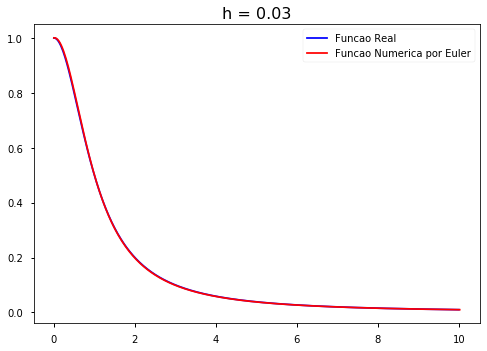

In [16]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Real')
plt.plot(euler_003x,euler_003y,'r-',label='Funcao Numerica por Euler')
plt.title('h = 0.03',{'fontsize': 16})
plt.legend()

In [17]:
data_003h = list(zip(euler_003x,Vetor_ex1(euler_003x),euler_003y))
df_003h = pd.DataFrame(data_003h,columns=['T','Sol.Exata','Euler'])
df_003h.head(13)

,T,Sol.Exata,Euler
0,0.00,1.000000,1.000000
1,0.03,0.999101,1.000000
2,0.06,0.996413,0.998200
3,0.09,0.991965,0.994613
4,0.12,0.985804,0.989271
5,0.15,0.977995,0.982225
6,0.18,0.968617,0.973542
7,0.21,0.957763,0.963306
8,0.24,0.945537,0.951613
9,0.27,0.932053,0.938573


##### Analise: 

Observando o grafico e o teste tabela, conclui-se que, usando um $h=0.03$, e possivel obter resultados satisfatorios para o **metodo de Euler**.

***

##### Runge-Kutta segunda ordem $h=0.1$


In [18]:
rk2_01x,rk2_01y = edo_1ordem(ex_1,1,[0,10],.1,metodo='rk2')

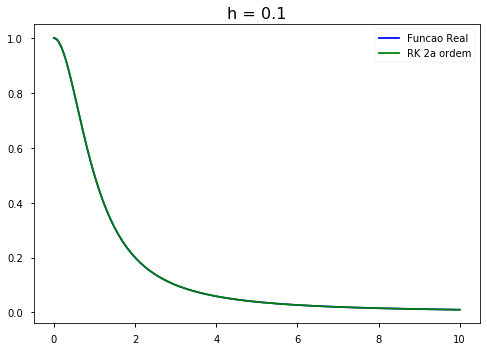

In [19]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Real')
plt.plot(rk2_01x,rk2_01y,'g-',label='RK 2a ordem')
plt.title('h = 0.1',{'fontsize': 16})
plt.legend()

In [20]:
data_01h = list(zip(rk2_01x,Vetor_ex1(rk2_01x),rk2_01y))
df_01h = pd.DataFrame(data_01h,columns=['T','Sol.Exata','RK 2a ordem'])
df_01h.head(13)

,T,Sol.Exata,RK 2a ordem
0,0.0,1.000000,1.000000
1,0.1,0.990099,0.990000
2,0.2,0.961538,0.961366
3,0.3,0.917431,0.917246
4,0.4,0.862069,0.861954
5,0.5,0.800000,0.800034
6,0.6,0.735294,0.735527
7,0.7,0.671141,0.671587
8,0.8,0.609756,0.610399
9,0.9,0.552486,0.553289


#### Analise:
Obersando tanto o grafico quanto o teste tabela, percebe-se que **RK 2a ordem** apresentou resultados excelentes para $h=0.1$

***

#### Runge-Kutta 4a ordem $h=0.2$

In [21]:
rk4_02x,rk4_02y = edo_1ordem(ex_1,1,[0,10],.1,metodo='rk4')

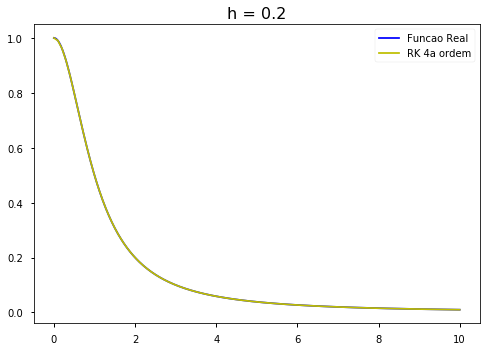

In [22]:
plt.plot(X_ex1,Y_ex1,'b-',label='Funcao Real')
plt.plot(rk4_02x,rk4_02y,'y-',label='RK 4a ordem')
plt.title('h = 0.2',{'fontsize': 16})
plt.legend()

In [23]:
data_02h = list(zip(rk4_02x,Vetor_ex1(rk4_02x),rk4_02y))
df_02h = pd.DataFrame(data_02h,columns=['T','Sol.Exata','RK 4a ordem'])
df_02h.head(13)

,T,Sol.Exata,RK 4a ordem
0,0.0,1.000000,1.000000
1,0.1,0.990099,0.990099
2,0.2,0.961538,0.961538
3,0.3,0.917431,0.917431
4,0.4,0.862069,0.862068
5,0.5,0.800000,0.799999
6,0.6,0.735294,0.735294
7,0.7,0.671141,0.671141
8,0.8,0.609756,0.609756
9,0.9,0.552486,0.552487


#### Analise:
Resultados praticamente identicos entre a solucao exata e o metodo de **Runge-Kutta 4a ordem**

***

## EDOS DE 2a ORDEM

In [24]:
def taylor(funcao,y0,y_linha0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    der = y_linha0
    
    for k in range(1,N+1):
        t[k] = k*h
        der_segunda = funcao(t[k-1],Y_t[k-1],der)
        
        Y_t[k] = Y_t[k-1] + der*h + (der_segunda/2.0)*h**2
        
        der = der + der_segunda*h
        
    return t,Y_t

In [25]:
def RKN(funcao,y0,y_linha0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    der = y_linha0
    
    for k in range(1,N+1):
        t[k] = k*h
        
        K1 = (h/2.0)*funcao(t[k-1],Y_t[k-1],der)
        
        Q = (h/2.0)*(der + K1/2.0)
        
        K2 = (h/2.0)*funcao(t[k-1]+h/2.0,
                           Y_t[k-1]+Q,
                           der+K1)
        K3 = (h/2.0)*funcao(t[k-1]+h/2.0,
                           Y_t[k-1]+Q,
                           der+K2)
        L = h*(der+K3)
        K4 = (h/2.0)*funcao(t[k-1]+h,
                           Y_t[k-1]+L,
                           der+2*K3)
        
        Y_t[k] = Y_t[k-1] + h*(der+(1.0/3)*(K1+K2+K3))
        
        der = der + (1.0/3)*(K1 + 2*K2 + 2*K3 + K4)
        
    return t,Y_t

In [26]:
def edo_2ordem(funcao,y0,y_linha0,intervalo_T,passo,metodo='rkn'):
    '''"Integra" uma EDO de segunda ordem a partir de 2 diferentes
    metodos, escolha a criterio do usuario.
    
    Argumentos:
    
        Funcao(t,Y,Y')
            Ex: lambda t,Y = 1/t**2 * Y + Y';
            
        y0  
            Ex: .5 (valor de y inicial);
        
        y_linha0
            Ex: 0 (valor inicial da derivada de y)
            
        Intervalo de tempo T
            Intervalo de integracao T.
            Ex: 0 <= t <= 10  --> intervalo_T = [0,10];
        
        Passo
            Incremento h a ser aplicado a t a cada iteracao.
            No geral, o metodo de menor ordem (taylor) deve possuir menor
            valor 'Passo' para obter boa precisao.
        
    Metodos aceitos:
        Runge–Kutta-Nyström: "rkn", metodo default.
        'Expansao em Serie de Taylor': "taylor".
        '''
    if metodo =='taylor':
        return taylor(funcao,y0,y_linha0,intervalo_T,passo)
    else:
        return RKN(funcao,y0,y_linha0,intervalo_T,passo)

***

### Exercicio 2

$$my''(t)+cy'(t)+ky(t)=F(t)$$ onde $m=1$ $c=0.2$, $k=1$;
$$F(t)=2sin(wt)+sin(2wt)+cos(3wt)$$  onde $w=0.5$ <br><br>  Dadas as condicoes iniciais: $y'(0)=y(0)=0.0$

**Primeiro passo**:
- Definir explicitamente $y''(t)$

$$y''(t) = 2sin(0.5t)+sin(t)+cos(1.5t)-0.2y'(t)-y(t)$$

In [27]:
func_ex2 = lambda t,y_t,y_linha : 2*sin(0.5*t)+sin(t)+cos(1.5*t)-0.2*y_linha-y_t

**Tomando h = 0.3 para ambos os algoritmos:**

In [28]:
rkn_x,rkx_y = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.3)
taylor_x,taylor_y = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.3,metodo='taylor')

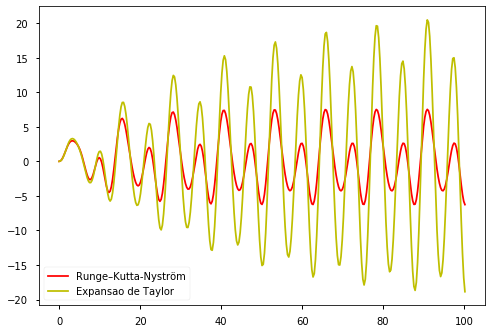

In [29]:
plt.plot(rkn_x,rkx_y,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x,taylor_y,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**Definindo h = 0.2 para ambos:**

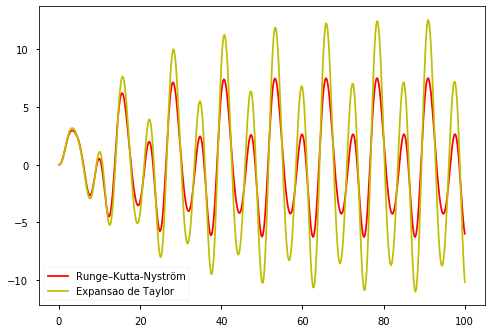

In [30]:
rkn_x2,rkx_y2 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.2)
taylor_x2,taylor_y2 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.2,metodo='taylor')
plt.plot(rkn_x2,rkx_y2,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x2,taylor_y2,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**Definindo h = 0.15 para ambos:** 

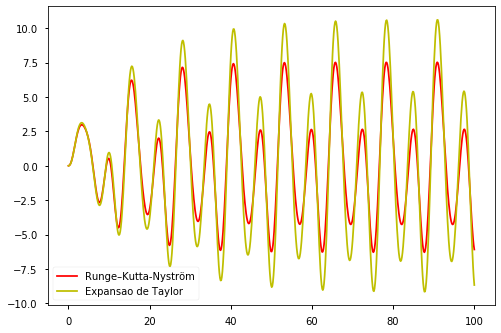

In [31]:
rkn_x3,rkx_y3 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.15)
taylor_x3,taylor_y3 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.15,metodo='taylor')
plt.plot(rkn_x3,rkx_y3,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x3,taylor_y3,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**Definindo h = 0.1 para Runge–Kutta-Nyström e h = 0.01 para Taylor:**

In [32]:
rkn_hx,rkn_hy = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.1)
taylor_hx,taylor_hy = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.01,metodo='taylor')

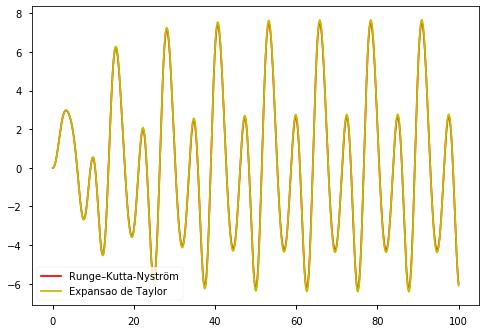

In [33]:
plt.plot(rkn_hx,rkn_hy,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_hx,taylor_hy,'y-',label='Expansao de Taylor')
plt.legend()

#### Fazendo comparacao:

Text(0.5, 1, 'rkn_h = 0.1 | taylor_h = 0.01')

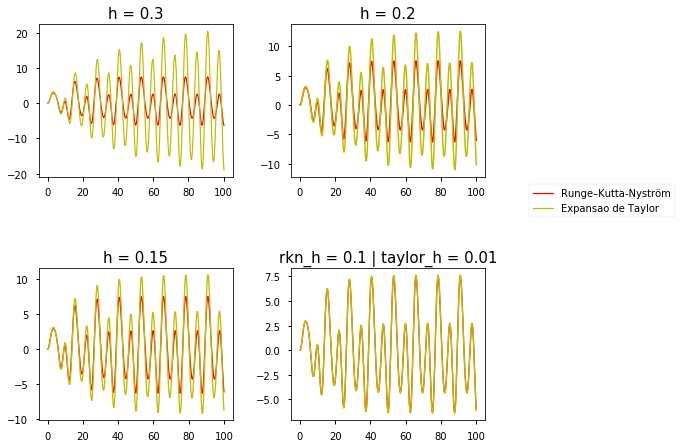

In [34]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.0,top = 1,wspace = 0.3,hspace = 0.6)
ax1.plot(rkn_x,rkx_y,'r-',label='Runge–Kutta-Nyström',linewidth=1.2)
ax1.plot(taylor_x,taylor_y,'y-',label='Expansao de Taylor',linewidth=1.2)
ax1.set_title('h = 0.3',{'fontsize': 15})
ax1.legend(bbox_to_anchor=(2.5, -0.3),loc='lower left')
ax2.plot(rkn_x2,rkx_y2,'r-',linewidth=1.5)
ax2.plot(taylor_x2,taylor_y2,'y-',linewidth=1.5)
ax2.set_title('h = 0.2',{'fontsize': 15})
ax3.plot(rkn_x3,rkx_y3,'r-',linewidth=1.3)
ax3.plot(taylor_x3,taylor_y3,'y-',linewidth=1.3)
ax3.set_title('h = 0.15',{'fontsize': 15})
ax4.plot(rkn_hx,rkn_hy,'r-',linewidth=1.3)
ax4.plot(taylor_hx,taylor_hy,'y-',linewidth=1.3)
ax4.set_title('rkn_h = 0.1 | taylor_h = 0.01',{'fontsize': 15})

#### Analise:
Os dois metodos convergiram para uma solucao parecida quando $h_{RKN} = 0.1$ e $h_{Taylor} = 0.01$

***

### Exercicio 3

#### Exemplo do Slide - Corpo queda livre na agua:

$$z''(t)=-g-k_Dz'(t)|z'(t)|$$<br> onde $g=9.80665$ e $k_D=1$. Assumindo $z'(0)=0$ $z(0)=0$ (REPOUSO)

In [35]:
func_ex3 = lambda t,y_t,y_linha : -9.80665 - y_linha*abs(y_linha)

**Atribuindo h = 0.1:**

In [36]:
t_taylor_ex3,y_taylor_ex3 = edo_2ordem(func_ex3,0,0,[0,20],0.1,metodo='taylor')
t_rkn_ex3,y_rkn_ex3 = edo_2ordem(func_ex3,0,0,[0,20],0.1,metodo='rkn')

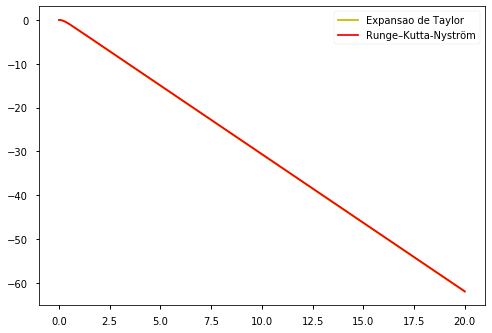

In [37]:
plt.plot(t_taylor_ex3,y_taylor_ex3,'y-',label='Expansao de Taylor')
plt.plot(t_rkn_ex3,y_rkn_ex3,'r-',label='Runge–Kutta-Nyström')
plt.legend()

##### Teste Tabela:

In [38]:
data_ex3 = list(zip(t_taylor_ex3,y_taylor_ex3,y_rkn_ex3))
df_ex3 = pd.DataFrame(data_ex3,columns=['T','Taylor','RKN'])
df_ex3

,T,Taylor,RKN
0,0.0,0.000000,0.000000
1,0.1,-0.049033,-0.048251
2,0.2,-0.191324,-0.184506
3,0.3,-0.409480,-0.388475
4,0.4,-0.677109,-0.637971
...,...,...,...
196,19.6,-60.771181,-60.685260
197,19.7,-61.084337,-60.998415
198,19.8,-61.397492,-61.311571
199,19.9,-61.710648,-61.624727
